In [1]:
import pandas as pd
import numpy as np
#import analysis.train_data_analysis 
#import analysis.model_assessment
import sys
import os


# Add the parent directory to sys.path
parent_dir = os.path.dirname(os.path.realpath('../../../preprocess'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import preprocess

C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = np.load('../../../../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

print(refls.shape)
print(wv.shape)

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 6) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print(scenes.shape)
print(wv_by_scene.shape)

(922806, 285)
(922806,)
(743, 1242, 285)
(743, 1242)
(718, 1242, 285)
(718, 1242)


In [ ]:
df = pd.read_pickle('../lhs_743.pkl')
df = df.drop(df.index[bad])
print(df.shape)
df.to_pickle('../lhs_18.pkl')

In [ ]:
df = pd.read_pickle('../lhs_743.pkl')
bad_df = df.iloc[bad, :]
bad_df.to_pickle('../lhs_bad_pixels_25.pkl')

In [ ]:
bad

In [ ]:
for i in range(wv_by_scene.shape[0]):
    plt.plot(wv_by_scene[i])
    plt.yticks(range(-1, 8))
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300])
    plt.ylabel('Water Vapor (g/cm^2)')
    plt.xlabel('Crosstrack Pixel Number')
    plt.title('Atmospheric WV for Cloud Filtered Individual Scene Downtracks');

In [ ]:
plt.imshow(wv_by_scene, vmin = -1, vmax = 8)
plt.colorbar()
yticks = range(0, 750, 75)
plt.yticks(yticks)
plt.xticks(range(0, 1300, 100), rotation = 'vertical')
plt.xlabel('Crosstrack Pixel Number')
plt.ylabel('Scene Number')
plt.title('WV for Cloud Filtered Individual Scene Crosstracks');

In [ ]:
analysis.train_data_analysis.plot_overall_hist(wv_by_scene)

In [ ]:
analysis.train_data_analysis.colorbar_all_crosstracks(wv_by_scene)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.hist(wv_by_scene.flatten())
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('WV Histogram EMIT Data')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(718, 100)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

In [ ]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
analysis.model_assessment.plot_hist_and_scatter(y_test, y_pred, 'DT Histogram', 'DT Scatter')

In [ ]:
from scipy.stats import gaussian_kde
xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT')

In [ ]:
plt.hist(y_train, alpha = 0.6, label = 'Train')
plt.hist(y_test, alpha = 0.6, label = 'Test')
plt.hist(y_pred, alpha = 0.6, label = 'Predicted')
plt.xlabel('Atmospheric WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('Train, Test and Predicted Histograms')
plt.legend()

In [ ]:
scenes.shape

In [ ]:
wv_by_scene.shape

In [ ]:
plt.hist(wv_by_scene.flatten())

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.arange(718)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)

In [ ]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

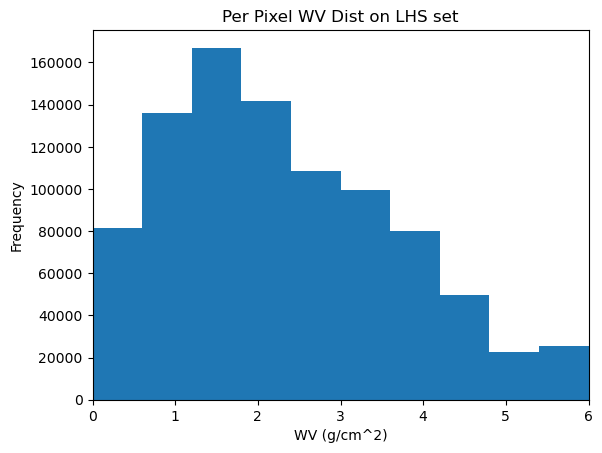

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(wv.flatten(), range = (0,6))
plt.title('Per Pixel WV Dist on LHS set')
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.xlim(0,6)
plt.show()